### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"mushroom_classification.csv"`**, which includes various features of mushrooms to predict whether they are edible or poisonous. The dataset comprises the following columns:

- `cap_diameter:` The diameter of the mushroom cap.
- `cap_shape:` The shape of the mushroom cap, encoded as integers.
- `gill_attachment:` The attachment of the gills, encoded as integers.
- `gill_color:` The color of the gills, encoded as integers.
- `stem_height:` The height of the mushroom stem.
- `stem_width` The width of the mushroom stem.
- `stem_color:` The color of the mushroom stem, encoded as integers.
- `season:` The season when the mushroom was found, encoded as float.
- `class:` The classification of the mushroom, where 0 indicates edible and 1 indicates poisonous.

Your task is to use this dataset to build and evaluate a binary classification model to classify mushrooms as edible or poisonous. You will start with basic models and gradually move towards advanced models like Gradient Boosting. Finally, you will explore various parameters of the Gradient Boosting model to enhance performance.

**Dataset credits:** Prisha Sawhney (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

**Import Necessary Libraries**

In [8]:
#import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

### Task 1: Data Preparation and Exploration

1. Import the data from the `"mushroom_classification.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.

In [2]:
# Step 1: Import the data from the "mushroom_classification.csv" file and store it in a variable 'df'

df = pd.read_csv("mushroom_classification.csv")
# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(54035, 9)


,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### Task 2: Exploratory Data Analysis (EDA)

1. Perform a group-by operation on the target class and calculate the mean of the following features: `cap_diameter, stem_height, and stem_width`.
2. Visualize the distribution of these features using box plots.

In [4]:
# Step 1: Perform a group-by operation on the target class and calculate the mean of specific features
x = df.groupby("class")["cap_diameter","stem_height","stem_width"].mean()

C:\Users\PARAG\AppData\Local\Temp\ipykernel_25300\1716506534.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = df.groupby("class")["cap_diameter","stem_height","stem_width"].mean()


In [5]:
x.head()

,cap_diameter,stem_height,stem_width
class,,,
0,633.064696,0.627374,1208.915189
1,513.236293,0.867251,921.516563


In [23]:
features_to_analyze = ['cap_diameter', 'stem_height', 'stem_width']
grouped = df.groupby('class')[features_to_analyze].mean()
print("Grouped by target class:")
print(grouped)

Grouped by target class:
       cap_diameter  stem_height   stem_width
class                                        
0        633.064696     0.627374  1208.915189
1        513.236293     0.867251   921.516563


<Figure size 1200x600 with 0 Axes>

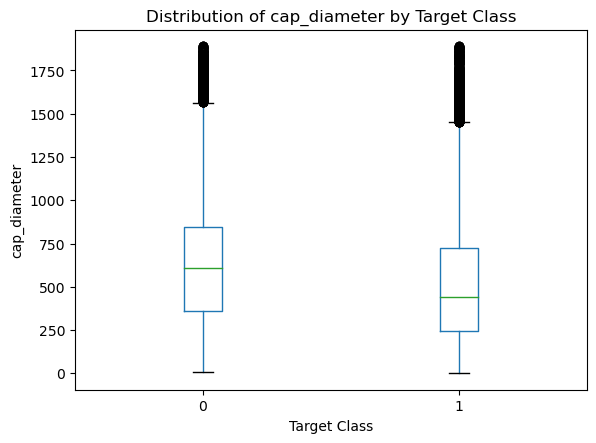

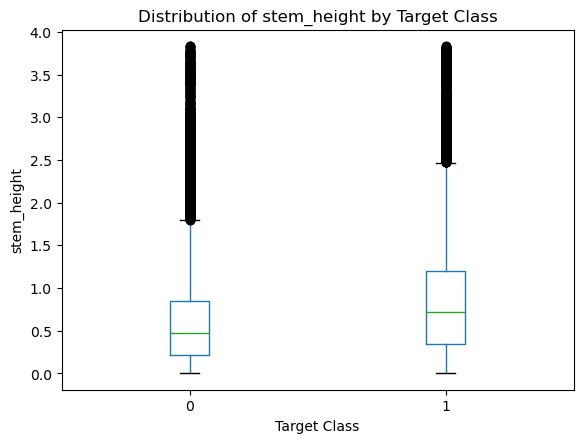

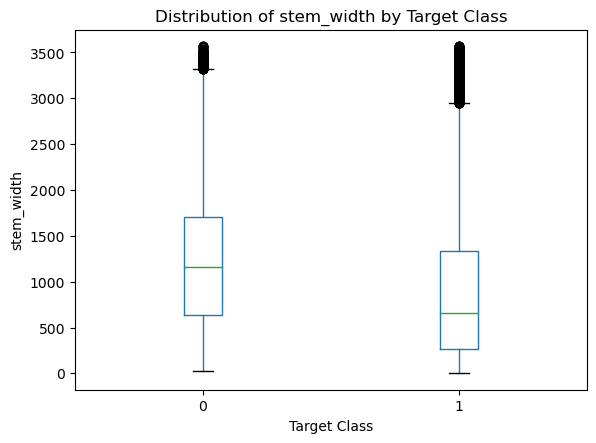

In [24]:
# Step 2: Visualize the distribution of these features using box plots
plt.figure(figsize=(12, 6))
for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

### Task 3: Model Training Using Basic Models

1. Select the features `(cap_diameter, cap_shape, gill_attachment, gill_color, stem_height, stem_width, stem_color, season)` and the target variable `(class)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Logistic Regression model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.
6. Initialize and train a Decision Tree Classifier model using the training data.
7. Make predictions on the test set using the trained model.
8. Evaluate the model using a classification report and print the report.

In [25]:
# Step 1: Select the features and target variable for modeling
X = df[["cap_diameter", "cap_shape", "gill_attachment", "gill_color", "stem_height", "stem_width", "stem_color", "season"]]
y = df["class"]

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)



In [26]:
# Step 3: Initialize and train a Logistic Regression model using the training data

model = LogisticRegression()
model.fit(X_train,y_train)
# Step 4: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      6087
           1       0.65      0.67      0.66      7422

    accuracy                           0.62     13509
   macro avg       0.61      0.61      0.61     13509
weighted avg       0.62      0.62      0.62     13509



In [27]:
# Step 6: Initialize and train a Decision Tree Classifier model using the training data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# Step 7: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Step 8: Evaluate the model using a classification report and print the report
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6087
           1       0.98      0.98      0.98      7422

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509



### Task 4: Model Training Using Gradient Boosting Classifier

1. Initialize and train a Gradient Boosting Classifier model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Calculate and display the feature importances.

In [28]:
# Step 1: Initialize and train a Gradient Boosting Classifier model using the training data
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train,y_train)

# Step 2: Make predictions on the test set using the trained model

y_pred = gbmodel.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6087
           1       0.90      0.89      0.89      7422

    accuracy                           0.88     13509
   macro avg       0.88      0.88      0.88     13509
weighted avg       0.88      0.88      0.88     13509



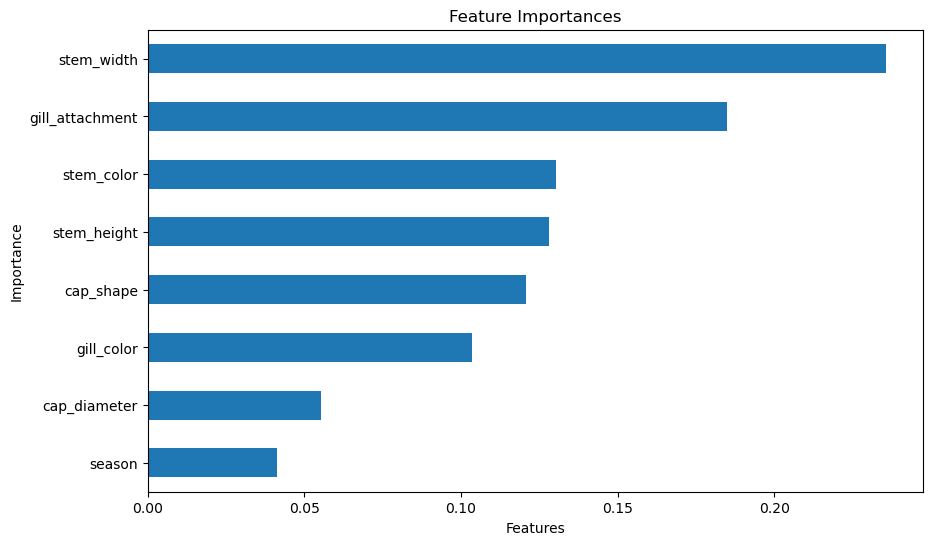

In [29]:
# Step 4: Calculate and display the feature importances
feature_importances = pd.Series(gbmodel.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Task 5: Exploring Various Parameters in Gradient Boosting Classifier

1. Train a Gradient Boosting model with the following parameters:
    - learning_rate = 0.05
    - n_estimators = 150
    - max_depth=4
    - min_samples_split = 3
    - min_samples_leaf = 2

Learn about these parameters here: [scikit-learn GradientBoostingClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [31]:
# Step 1: Train a Gradient Boosting model with specified parameters
gb_para = GradientBoostingClassifier(learning_rate=0.05 , n_estimators= 150 , max_depth= 4 , min_samples_split= 3 , min_samples_leaf=2)
gb_para.fit(X_train,y_train)
# Step 2: Make predictions on the test set using the trained model
y_pred = gb_para.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6087
           1       0.93      0.90      0.91      7422

    accuracy                           0.90     13509
   macro avg       0.90      0.90      0.90     13509
weighted avg       0.90      0.90      0.90     13509

